### Pattern Recognition
### Assignment 4  
### COE19B007 - Praveen B R
#### Question 5
**Q5.)
 Eigenfaces- Face classification using PCA (40 classes)**
- Use the following face image files (face-ds.zip) to classify the faces of 40 different people.
- Use PCA to reduce the dimensions from d to d’.
- Use appropriate classifier taught in class (any classification algorithm taught in class like Bayes classifier,
minimum distance classifier, and so on )


In [169]:
import cv2
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [170]:
loc = "./data/face/"

In [171]:
fvs = {}
data = []
label = []
for img in os.listdir(loc):
    face_class = int(re.search("_.*\.",str(img)).group()[1:-1])
    fv = cv2.imread(loc+img,0)
    fv = fv.reshape(70*80,)
    if face_class-1 not in fvs.keys(): fvs[face_class-1] =[]
    fvs[face_class-1].append(fv)
    data.append(np.array(fv))
    label.append(face_class)

In [172]:
data = pd.DataFrame(np.array(data))

In [173]:
data

,0,1,2,3,4,5,6,7,8,9,...,5590,5591,5592,5593,5594,5595,5596,5597,5598,5599
0,90,109,100,102,103,105,104,103,102,102,...,36,22,45,66,51,57,60,65,75,65
1,89,110,103,102,101,103,102,102,104,103,...,33,40,56,70,66,69,69,70,75,62
2,36,43,37,41,37,39,40,40,40,37,...,37,36,36,38,32,30,33,38,47,36
3,46,53,49,49,52,52,55,54,55,50,...,49,50,48,46,48,50,54,55,59,46
4,18,25,21,22,24,21,23,23,24,21,...,81,96,107,124,136,147,157,153,165,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,27,36,33,33,33,26,28,31,33,31,...,111,104,119,165,152,172,176,183,93,12
396,79,101,94,94,94,94,92,94,93,102,...,53,52,42,40,41,25,19,30,40,42
397,114,138,131,131,131,132,130,132,134,135,...,183,136,127,117,110,104,96,92,100,82
398,38,46,39,43,45,45,47,44,46,43,...,78,63,56,72,70,80,91,85,71,37


In [174]:
len(data),len(data[0]), data.shape

(400, 400, (400, 5600))

In [175]:
print(data.iloc[1].min())
print(data.iloc[1].max())

14
210


In [177]:
(fv,fv.shape,fv.size)

(array([28, 32, 31, ..., 43, 50, 42], dtype=uint8), (5600,), 5600)

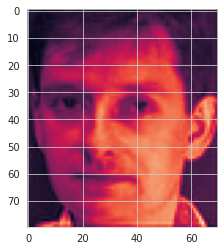

In [178]:
plt.imshow(fv.reshape(80,70))
plt.show()

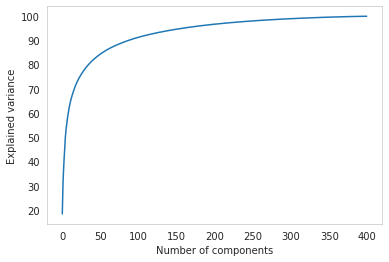

In [179]:
from sklearn.decomposition import PCA
pca_400 = PCA(n_components=400)
pca_400.fit(data)

plt.grid()
plt.plot(np.cumsum(pca_400.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

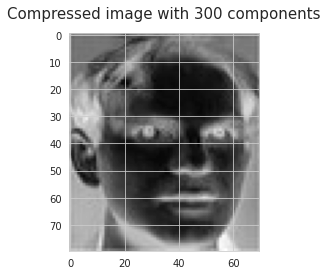

In [180]:
data_reduced = pca_400.fit_transform(data)
data_recovered = pca_400.inverse_transform(data_reduced)

image_pca_400 = data_recovered[1,:].reshape([80,70])
plt.imshow(image_pca_400, cmap='gray_r')
plt.title('Compressed image with 300 components', fontsize=15, pad=15)
plt.show()

In [181]:
var1=np.cumsum(np.round(pca_400.explained_variance_ratio_, decimals=4)*100)
var1

array([ 18.34,  31.76,  38.85,  44.64,  49.95,  53.44,  55.97,  58.38,
        60.41,  62.27,  63.75,  65.19,  66.34,  67.43,  68.43,  69.36,
        70.25,  71.11,  71.86,  72.57,  73.25,  73.9 ,  74.5 ,  75.05,
        75.59,  76.09,  76.58,  77.06,  77.51,  77.95,  78.38,  78.78,
        79.17,  79.55,  79.92,  80.27,  80.61,  80.94,  81.26,  81.56,
        81.85,  82.14,  82.42,  82.69,  82.95,  83.2 ,  83.45,  83.69,
        83.93,  84.17,  84.4 ,  84.61,  84.82,  85.03,  85.24,  85.44,
        85.64,  85.83,  86.02,  86.2 ,  86.38,  86.55,  86.72,  86.88,
        87.04,  87.2 ,  87.35,  87.5 ,  87.65,  87.79,  87.93,  88.07,
        88.21,  88.34,  88.47,  88.6 ,  88.73,  88.86,  88.99,  89.11,
        89.23,  89.35,  89.47,  89.59,  89.7 ,  89.81,  89.92,  90.03,
        90.14,  90.25,  90.36,  90.46,  90.56,  90.66,  90.76,  90.86,
        90.96,  91.05,  91.14,  91.23,  91.32,  91.41,  91.5 ,  91.59,
        91.67,  91.75,  91.83,  91.91,  91.99,  92.07,  92.15,  92.23,
      

In [182]:
x1 = pca_400.fit_transform(data)
x1

array([[-1.16940293e+03, -7.34974982e+02,  8.32128534e+02, ...,
         9.47084281e+01, -6.40939254e+01,  4.25647903e-13],
       [ 1.68257522e+03, -1.16953729e+03,  3.64227109e+02, ...,
        -2.96882757e+00, -1.14644851e+01,  4.25647903e-13],
       [-1.05821492e+03, -7.63143101e+02, -8.57351933e+02, ...,
         4.49238620e-01, -3.31387998e-01,  4.25647903e-13],
       ...,
       [-8.30956937e+01, -2.61140066e+03,  7.34565212e+02, ...,
        -1.87481897e+00, -6.08348592e+00,  4.25647903e-13],
       [ 9.61316731e+02,  1.17395148e+03, -6.13280996e+02, ...,
         3.19428319e+00,  1.77442144e+00,  4.25647903e-13],
       [-1.10052646e+03, -5.18812880e+00, -8.88597238e+02, ...,
         1.03769146e+01,  5.82876370e-01,  4.25647903e-13]])

In [183]:
len(data_reduced[0]) #reduced to 400 dimensions

400

In [184]:
label = np.array(label).reshape(400,1)

In [185]:
class NaiveBayesClassifier():
    '''
    Bayes Theorem form
    P(y|X) = P(X|y) * P(y) / P(X)
    '''
    def calc_prior(self, features, target):
        '''
        prior probability P(y)
        calculate prior probabilities
        '''
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / self.rows).to_numpy()

        return self.prior
    
    def calc_statistics(self, features, target):
        '''
        calculate mean, variance for each column and convert to numpy array
        ''' 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        self.var = features.groupby(target).apply(np.var).to_numpy()
              
        return self.mean, self.var
    
    def gaussian_density(self, class_idx, x):     
        '''
        calculate probability from gaussian density function (normally distributed)
        we will assume that probability of specific target value given specific class is normally distributed 
        
        probability density function derived from wikipedia:
        (1/√2pi*σ) * exp((-1/2)*((x-μ)^2)/(2*σ²)), where μ is mean, σ² is variance, σ is quare root of variance (standard deviation)
        '''
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp((-1/2)*((x-mean)**2) / (2 * var))
#         numerator = np.exp(-((x-mean)**2 / (2 * var)))
        denominator = np.sqrt(2 * np.pi * var)
        prob = numerator / denominator
        return prob
    
    def calc_posterior(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for i in range(self.count):
            prior = np.log(self.prior[i]) ## use the log to make it more numerically stable
            conditional = np.sum(np.log(self.gaussian_density(i, x))) # use the log to make it more numerically stable
            posterior = prior + conditional
            posteriors.append(posterior)
        # return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]
     

    def fit(self, features, target):
        self.classes = np.unique(target)
        self.count = len(self.classes)
        self.feature_nums = features.shape[1]
        self.rows = features.shape[0]
        
        self.calc_statistics(features, target)
        self.calc_prior(features, target)
        
    def predict(self, features):
        preds = [self.calc_posterior(f) for f in features.to_numpy()]
        return preds

    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, y_true, y_pred, target):
        
        tr = pd.DataFrame(data=y_true, columns=[target])
        pr = pd.DataFrame(data=y_pred, columns=[target])
        
        
        fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(30,15))
        sns.set_style("whitegrid")
        sns.countplot(x=target, data=tr, ax=ax[0], palette='viridis', alpha=0.7, hue=target, dodge=False)
        sns.countplot(x=target, data=pr, ax=ax[1], palette='viridis', alpha=0.7, hue=target, dodge=False)
        fig.suptitle('True vs Predicted Comparison', fontsize=20)

        ax[0].tick_params(labelsize=12)
        ax[1].tick_params(labelsize=12)
        ax[0].set_title("True values", fontsize=18)
        ax[1].set_title("Predicted values", fontsize=18)
        
        plt.show()

In [186]:
y = pd.DataFrame(label)
y

,0
0,23
1,18
2,36
3,16
4,34
...,...
395,24
396,26
397,6
398,28


In [187]:
df = pd.DataFrame(data_reduced)
df["label"] = y
df

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,label
0,-1169.402926,-734.974982,832.128534,291.922757,698.836141,370.393209,307.263880,-152.608040,-660.739580,56.392564,...,16.395010,-8.724461,50.960709,-207.769731,-15.187160,39.272221,94.708428,-64.093925,4.256479e-13,23
1,1682.575222,-1169.537292,364.227109,-910.678244,-395.490602,-223.372200,-771.486791,26.524629,44.734343,422.270822,...,-3.686180,8.666545,-12.695015,7.717485,-9.234847,-12.679659,-2.968828,-11.464485,4.256479e-13,18
2,-1058.214920,-763.143101,-857.351933,-234.625394,441.996628,355.407053,749.897744,43.642671,207.665250,-223.658269,...,-6.788656,-8.063803,3.553565,-4.698899,13.479193,5.218996,0.449239,-0.331388,4.256479e-13,36
3,947.177219,70.302012,-825.084533,-485.801866,465.460865,494.777880,-1204.330727,196.888570,14.397877,-696.460166,...,-5.775101,9.592256,2.487699,-2.121324,5.524988,0.074530,-4.459209,12.603376,4.256479e-13,16
4,-472.960936,2143.686226,381.484433,-1097.570472,849.581558,-381.667417,-163.054943,-325.759053,-103.670035,27.772922,...,101.567441,-161.061049,37.656114,48.199267,7.495907,29.589598,22.485519,1.311665,4.256479e-13,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-913.531304,114.095982,-1183.964547,-882.937830,562.007174,56.276846,60.478718,469.378534,368.457350,-559.180366,...,7.387876,-11.174828,-1.352942,6.994233,-19.658767,3.777088,-8.113296,5.860660,4.256479e-13,24
396,1052.642787,97.498568,1131.808759,19.218717,-1189.409069,-463.491538,228.997065,-505.804487,-311.371332,408.179158,...,-8.119080,4.552962,6.486989,-6.276151,6.206673,-0.013425,-12.748951,-9.527121,4.256479e-13,26
397,-83.095694,-2611.400663,734.565212,-687.489612,1249.615119,348.781388,-405.269794,141.206877,-830.633031,-23.251980,...,-4.936175,12.706085,0.676451,10.540745,6.439111,1.816962,-1.874819,-6.083486,4.256479e-13,6
398,961.316731,1173.951480,-613.280996,-159.472261,-397.926711,13.242046,212.388287,-418.588618,-680.552265,691.467183,...,-15.184938,-3.787992,-2.457942,-4.401823,6.942827,11.041763,3.194283,1.774421,4.256479e-13,28


In [188]:
train_data = df.groupby('label').apply(lambda x: x.tail(8)).reset_index(drop=True)
test_data = df.groupby('label').apply(lambda x: x.head(2)).reset_index(drop=True)
X_train, y_train = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X_test, y_test = test_data.iloc[:, :-1], test_data.iloc[:, -1]

In [189]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2059.209608,-318.712699,-783.107566,-1437.055276,-911.246475,659.414028,-426.587183,160.068388,288.332686,-814.174042,...,8.265483,1.685931,-1.176135,-12.270334,-14.166258,10.236277,6.769147,0.480969,-10.084548,4.256479e-13
1,1121.060211,-791.421911,-1366.863026,-193.859612,506.649649,90.461744,-304.935787,279.368514,328.340609,-756.288045,...,-10.623807,-8.410609,4.686902,5.414751,1.578736,1.131519,-6.476627,4.059938,0.917942,4.256479e-13
2,2677.322026,-595.057004,-83.885466,-1566.343791,169.174388,336.533991,-391.768057,-153.817894,-79.234154,-88.385999,...,10.455469,7.567327,-1.261349,14.569843,7.614271,3.470572,1.861595,-3.083955,5.879259,4.256479e-13
3,1855.395499,-836.028929,12.567588,-1254.389576,1220.480889,305.205323,398.588380,813.874812,-285.678028,-523.379329,...,17.674273,-4.725319,-1.958777,-9.744543,-0.448928,-5.036531,-5.722632,-12.756228,9.834243,4.256479e-13
4,1980.983097,-282.094183,-730.692112,28.293794,756.132210,791.972900,-332.894929,-177.831856,817.400812,-600.070164,...,-9.583483,7.968636,1.539281,-7.310777,5.124238,-11.884911,-4.960027,-7.210239,-5.576587,4.256479e-13


In [190]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,2012.976991,-881.220957,-299.695977,-1849.653121,-527.166258,974.492429,-501.015922,-96.021323,-223.264444,-380.400856,...,-12.005635,-2.498122,-8.911870,0.966420,11.589519,3.581081,-1.155031,3.479381,-3.535097,4.256479e-13
1,2188.599341,-557.093902,339.352165,-873.032880,1849.971003,-282.010946,-899.857563,-244.613608,284.777356,47.400988,...,1.226877,-4.185368,4.388054,-11.918862,10.948002,-8.380711,-6.899382,0.410881,-1.511684,4.256479e-13
2,521.497495,587.249717,-1132.672673,-31.692418,403.171039,332.730372,78.542013,-566.130462,549.964445,-188.381362,...,5.073459,6.223436,18.295369,9.462556,-26.476032,-12.167029,-8.604895,-6.169187,-6.393512,4.256479e-13
3,656.507038,373.972675,-1000.455830,-318.026711,579.678149,206.624187,379.232030,-400.707511,442.664893,-210.814866,...,-1.294853,-0.118732,2.078344,1.427782,12.321593,2.971916,4.369596,6.187509,2.422611,4.256479e-13
4,1.732391,-469.299253,447.180880,-119.333705,-979.018830,-370.807978,-301.894659,-207.174261,-47.468315,306.573711,...,1.714560,20.524095,3.799476,11.560527,3.759458,-5.852821,-1.077048,11.071834,19.813495,4.256479e-13


In [191]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
315    40
316    40
317    40
318    40
319    40
Name: label, Length: 320, dtype: int64

In [192]:
#Naive Bayes Classifier
nbc = NaiveBayesClassifier()
mean, variance = nbc.calc_statistics(X_train, y_train)
nbc.fit(X_train, y_train)

/home/brp/Documents/sem 6/PR /PRenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/brp/Documents/sem 6/PR /PRenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [193]:
prediction = nbc.predict(X_test)

In [194]:
nbc.accuracy(y_test, prediction)

0.8

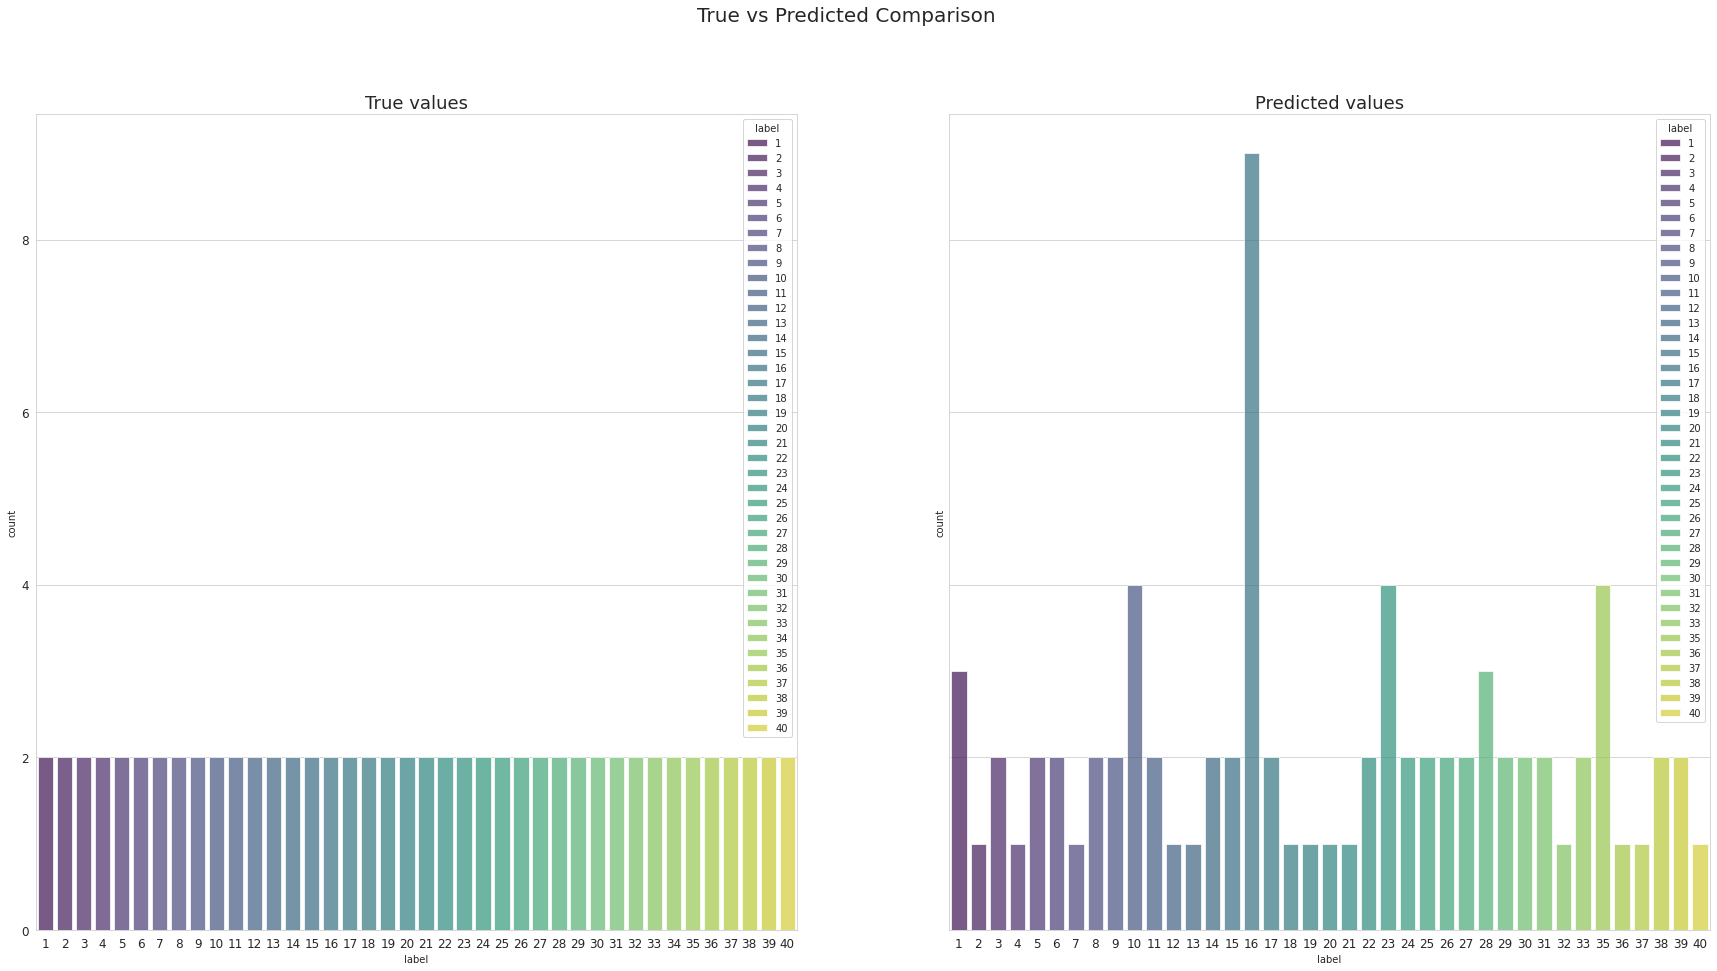

In [195]:
nbc.visualize(y_test, prediction, 'label')